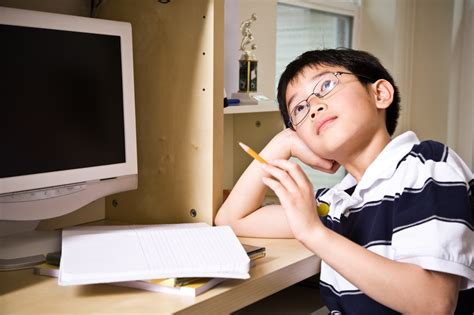

#ABOUT THE DATASET

Description: This dataset contains information on the performance of high school students in mathematics, including their grades and demographic information. The data was collected from three high schools in the United States.

---



---


"This dataset was created for educational purposes and was generated, not collected from actual data sources."

#USAGE

This dataset could be used for various research questions related to education, such as examining the impact of parental education or test preparation courses on student performance. It could also be used to develop machine learning models to predict student performance based on demographic and other factors.

# Approach to the prediction
* 1.Import all libaray
* 2.Load and audit the data 
* 3.Data prepration and Data Transformation
    * 1.Dealing withmissing value
    * 2.Inconsistent value: Replace all transformation with consistent values 
    * 3.Dealing With Outliers
* 4.Data visualization
* 5.Data analysis
    * 1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    * 2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    * 3.Multi-Variate Analysis
        * 1.Regression:Not a regressiion 
        * 2.Classification
            * 1.Apply Logistic Regression
            * 2.Apply Decision Tree
            * 3.Evalaute Between Logistic and Decision Tree Which is the better model

#Importing The Libraries




In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

#Importing The dataset

In [447]:
df=pd.read_csv('/content/exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


#Data Preprocessing

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [449]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [450]:
df['totalscore']=(df['math score']+df['reading score']+df['writing score'])
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalscore
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254


In [451]:
df['percentage']=(df['totalscore']/300)*100
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalscore,percentage
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


<Axes: >

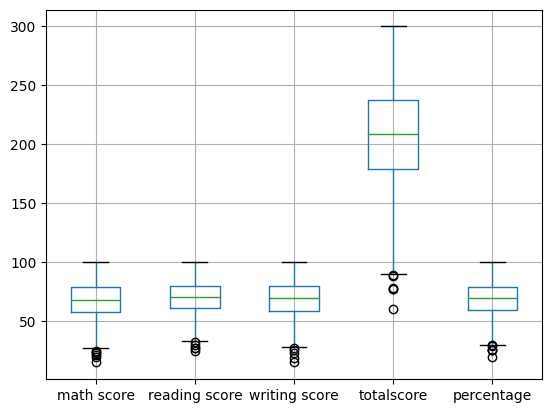

In [452]:
df.boxplot()

#Removing The Outliers

In [453]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range
    

In [454]:
low_leadtime,high_leadtime=remove_outlier(df['math score'])
df['math score']=np.where(df['math score']>high_leadtime,high_leadtime,df['math score'])
df['math score']=np.where(df['math score']<low_leadtime,low_leadtime,df['math score'])

In [455]:
low_leadtime,high_leadtime=remove_outlier(df['reading score'])
df['reading score']=np.where(df['reading score']>high_leadtime,high_leadtime,df['reading score'])
df['reading score']=np.where(df['reading score']<low_leadtime,low_leadtime,df['reading score'])

In [456]:

low_leadtime,high_leadtime=remove_outlier(df['writing score'])
df['writing score']=np.where(df['writing score']>high_leadtime,high_leadtime,df['writing score'])
df['writing score']=np.where(df['writing score']<low_leadtime,low_leadtime,df['writing score'])

In [457]:
low_leadtime,high_leadtime=remove_outlier(df['totalscore'])
df['totalscore']=np.where(df['totalscore']>high_leadtime,high_leadtime,df['totalscore'])
df['totalscore']=np.where(df['totalscore']<low_leadtime,low_leadtime,df['totalscore'])

In [458]:
low_leadtime,high_leadtime=remove_outlier(df['percentage'])
df['percentage']=np.where(df['percentage']>high_leadtime,high_leadtime,df['percentage'])
df['percentage']=np.where(df['percentage']<low_leadtime,low_leadtime,df['percentage'])

<Axes: >

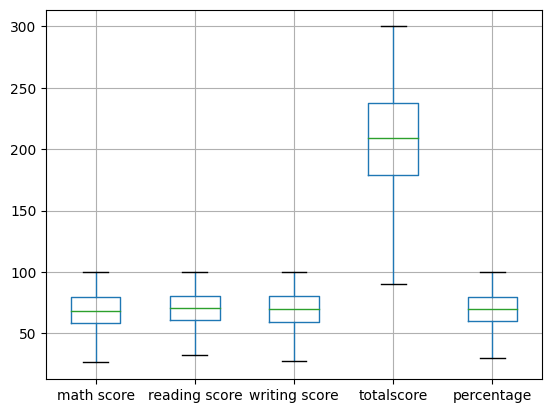

In [459]:
df.boxplot()

#Distribution of Percentage

<Axes: ylabel='Frequency'>

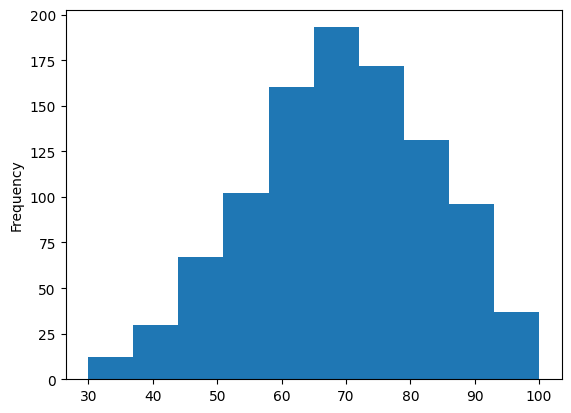

In [460]:
df['percentage'].plot(kind='hist')

#Percentage into Fail & Pass

In [461]:
validation=pd.DataFrame(pd.cut(df['percentage'],2, labels=['fail','pass']))
validation.columns=['validation']
df=pd.concat([df,validation],axis=1)
print(validation)

    validation
0         pass
1         pass
2         pass
3         pass
4         pass
..         ...
995       pass
996       pass
997       pass
998       pass
999       fail

[1000 rows x 1 columns]


In [462]:
res=pd.get_dummies(df['validation'],drop_first=True)
res.columns=['result']
df=pd.concat([df,res],axis=1)

In [463]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalscore,percentage,validation,result
0,female,group D,some college,standard,completed,59.0,70.0,78.0,207.0,69.000000,pass,1
1,male,group D,associate's degree,standard,none,96.0,93.0,87.0,276.0,92.000000,pass,1
2,female,group D,some college,free/reduced,none,57.0,76.0,77.0,210.0,70.000000,pass,1
3,male,group B,some college,free/reduced,none,70.0,70.0,63.0,203.0,67.666667,pass,1
4,female,group D,associate's degree,standard,none,83.0,85.0,86.0,254.0,84.666667,pass,1


#Total No Of Students Pass / Fail

<Axes: >

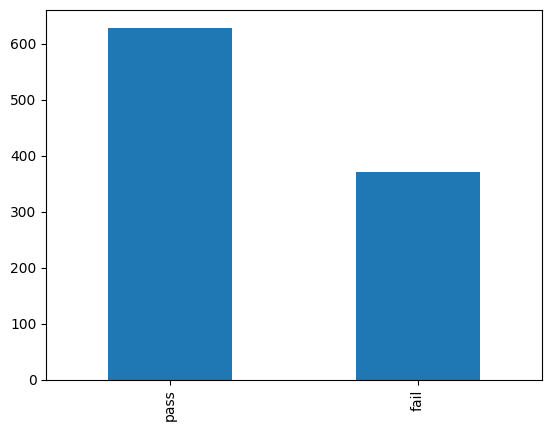

In [464]:
df['validation'].value_counts().plot(kind='bar')

#Relation Between categorical values dependent variable

<Axes: xlabel='gender'>

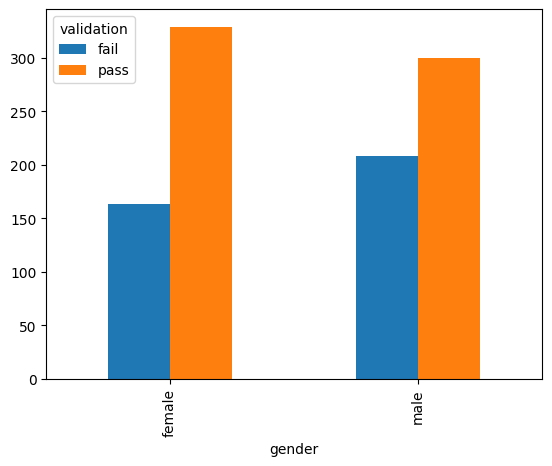

In [465]:
pd.crosstab(df.gender,df.validation).plot(kind="bar")

pass percentage is high in female . fail percentage is less in female




<Axes: xlabel='race/ethnicity'>

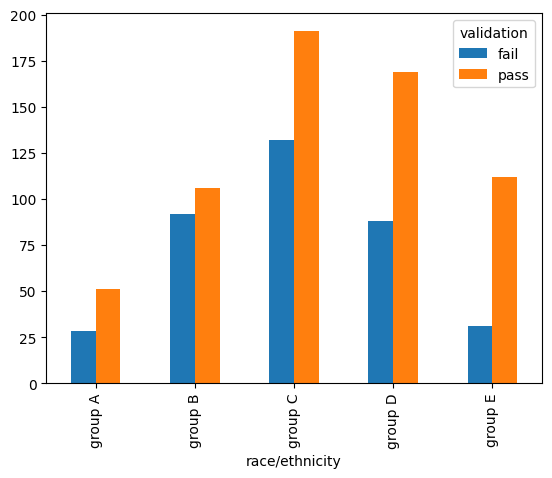

In [466]:
pd.crosstab(df['race/ethnicity'],df['validation']).plot(kind="bar")

group c and group D have more pass percentages. group A and group E has less fail percentages

<Axes: xlabel='parental level of education'>

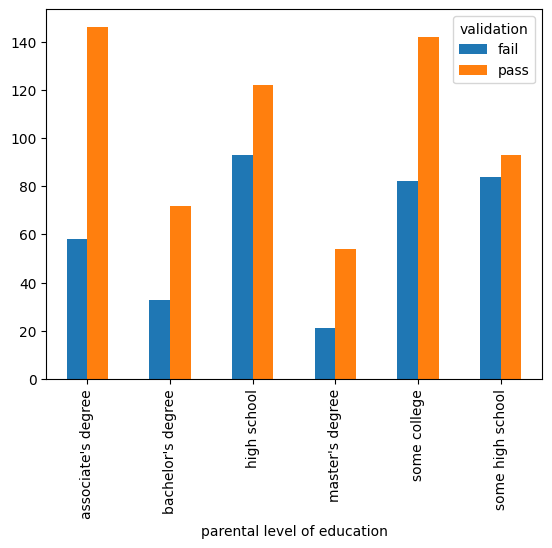

In [467]:
pd.crosstab(df['parental level of education'],df['validation']).plot(kind="bar")

<Axes: xlabel='lunch'>

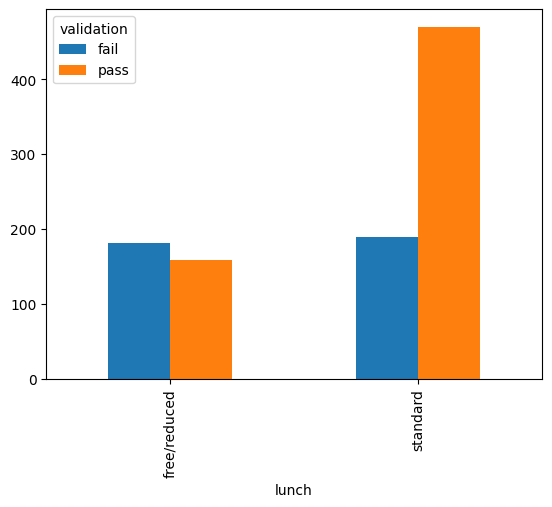

In [468]:
pd.crosstab(df['lunch'],df['validation']).plot(kind="bar")

students who had a standard lunch has gained more marks than the students who had less lunch

<Axes: xlabel='test preparation course'>

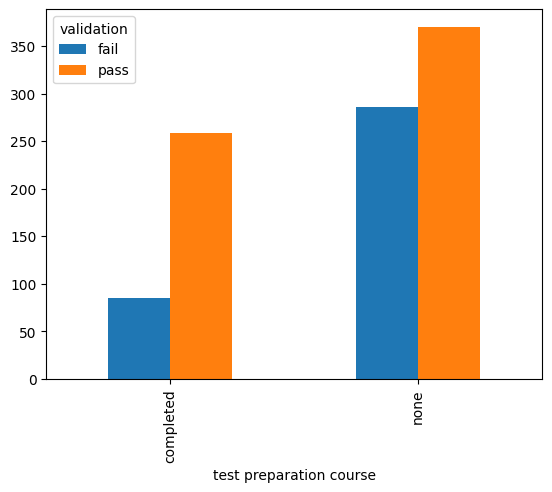

In [469]:
pd.crosstab(df['test preparation course'],df['validation']).plot(kind="bar")

students who prepared for the test has less fail percentages

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   float64 
 6   reading score                1000 non-null   float64 
 7   writing score                1000 non-null   float64 
 8   totalscore                   1000 non-null   float64 
 9   percentage                   1000 non-null   float64 
 10  validation                   1000 non-null   category
 11  result                       1000 non-null   uint8   
dtypes: category(1), float64(5), object(5), uint8(1)
memory usage: 8

from the eda we can understand that the data is linear ,there is not much nonlinearity in the data

#Univariate Analysis

In [471]:
df.describe()

,math score,reading score,writing score,totalscore,percentage,result
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.838750,70.403500,69.167500,207.402250,69.134083,0.629000
std,15.164599,14.045095,14.940998,41.870418,13.956806,0.483314
min,26.125000,32.500000,27.500000,89.875000,29.958333,0.000000
25%,58.000000,61.000000,59.000000,178.750000,59.583333,0.000000
50%,68.000000,70.500000,70.000000,209.000000,69.666667,1.000000
75%,79.250000,80.000000,80.000000,238.000000,79.333333,1.000000
max,100.000000,100.000000,100.000000,300.000000,100.000000,1.000000


In [472]:
df.skew()

<ipython-input-472-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


math score      -0.240765
reading score   -0.151702
writing score   -0.170530
totalscore      -0.212956
percentage      -0.212956
result          -0.534884
dtype: float64

#Bivariate Analysis

In [473]:
df.corr()

,math score,reading score,writing score,totalscore,percentage,result
math score,1.000000,0.811045,0.789425,0.916423,0.916423,0.739617
reading score,0.811045,1.000000,0.948499,0.967945,0.967945,0.766390
writing score,0.789425,0.948499,1.000000,0.961107,0.961107,0.772756
totalscore,0.916423,0.967945,0.961107,1.000000,1.000000,0.800936
percentage,0.916423,0.967945,0.961107,1.000000,1.000000,0.800936
result,0.739617,0.766390,0.772756,0.800936,0.800936,1.000000


<Axes: >

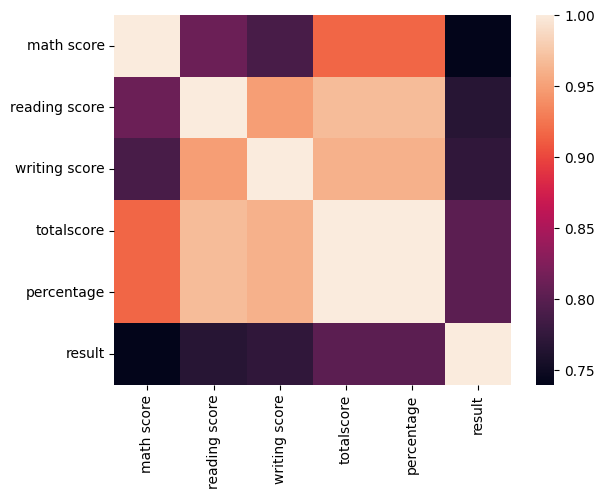

In [474]:
sns.heatmap(df.corr())

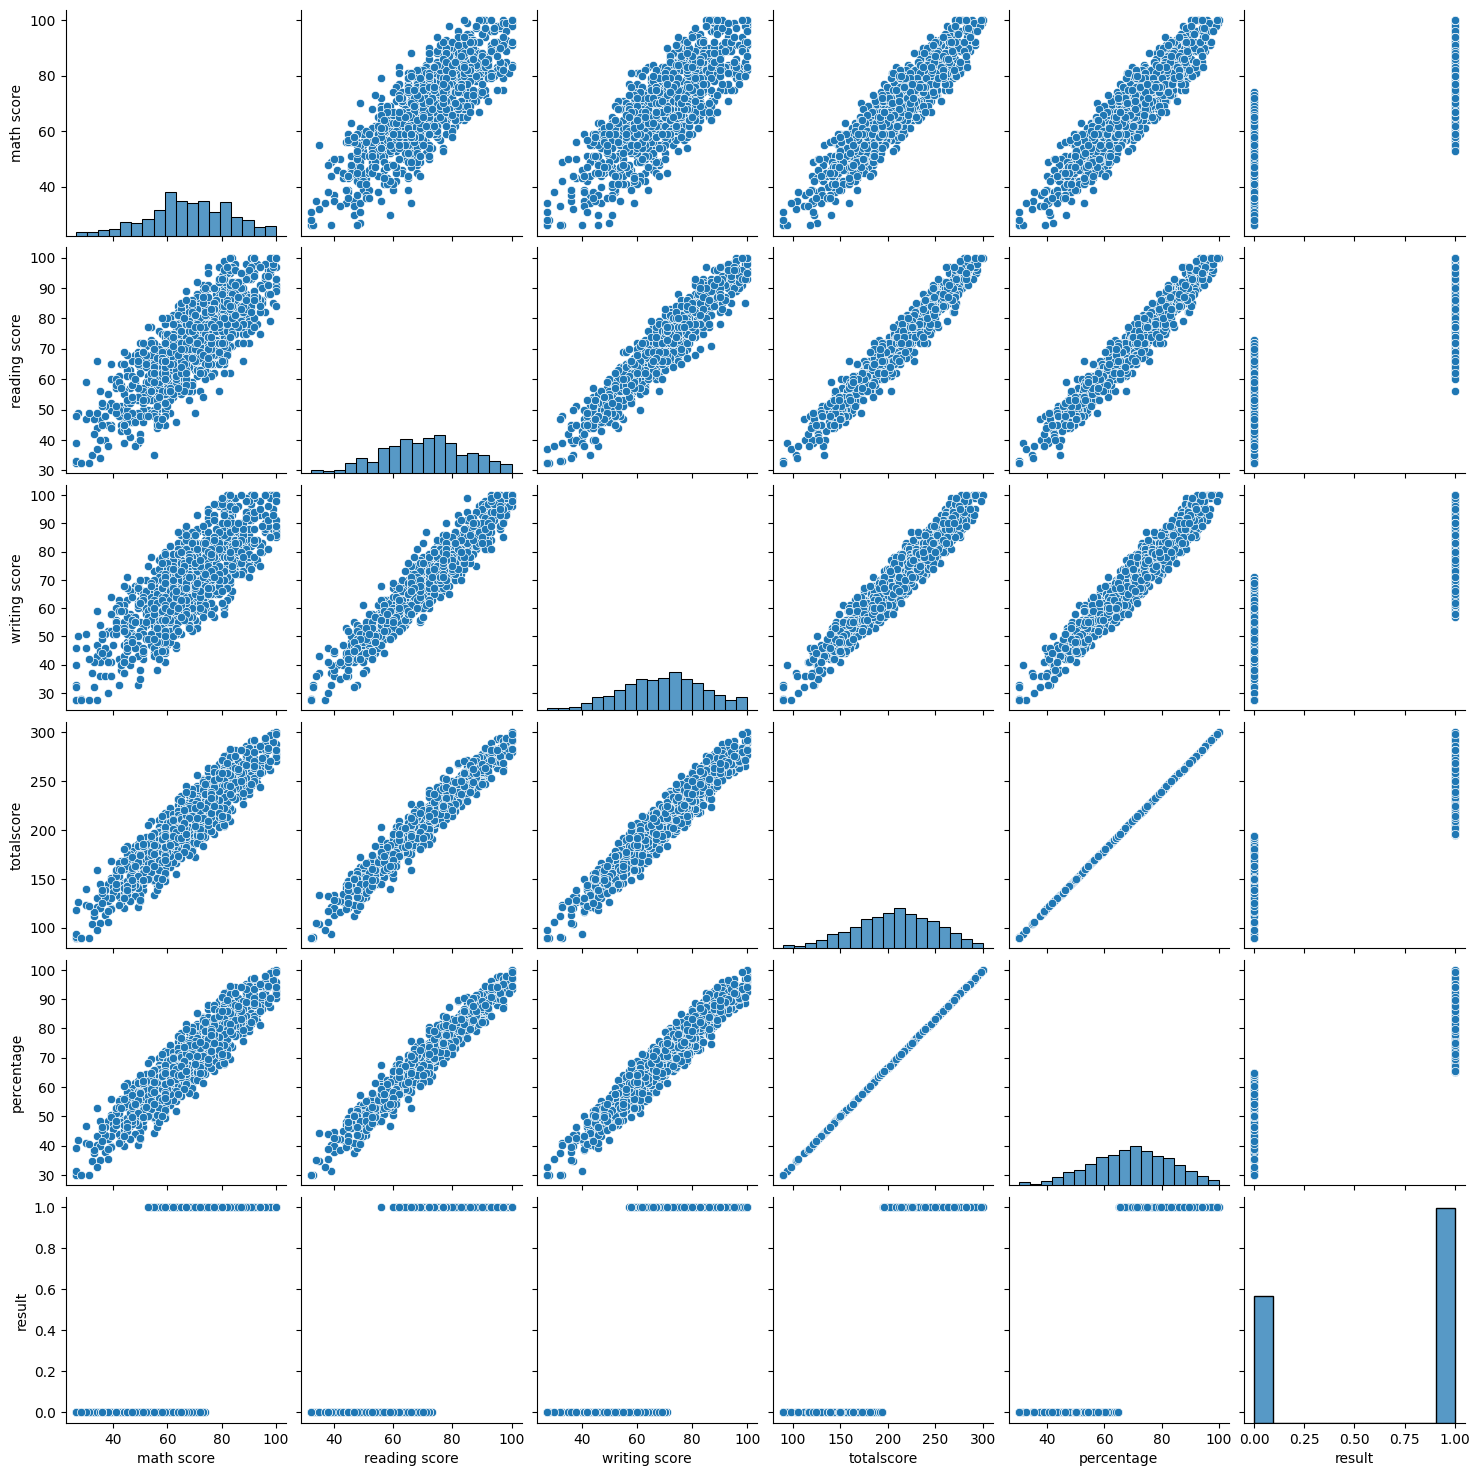

In [475]:
sns.pairplot(df)

In [476]:
def chi_sq(var1,var2):
  table=pd.crosstab(var1,var2)
  _,p,_,_=chi2_contingency(table)
  if p<=0.05:
    print('accept alternate hypothesis',round(p,2))
  else:
    print("failed to reject null hypo",round(p,2))
  return table



1.   null hypo=variables are independent
2.   alternate= variables are dependent




In [477]:
chi_sq(df['gender'],df['result'])
#entropy is low
#dependent

accept alternate hypothesis 0.01


result,0,1
gender,,
female,163,329
male,208,300


In [478]:
chi_sq(df['race/ethnicity'],df['result'])
#p value is 0.0
#dependent

accept alternate hypothesis 0.0


result,0,1
race/ethnicity,,
group A,28,51
group B,92,106
group C,132,191
group D,88,169
group E,31,112


In [479]:
chi_sq(df['parental level of education'],df['result'])

accept alternate hypothesis 0.0


result,0,1
parental level of education,,
associate's degree,58,146
bachelor's degree,33,72
high school,93,122
master's degree,21,54
some college,82,142
some high school,84,93


In [480]:
chi_sq(df['lunch'],df['result'])

accept alternate hypothesis 0.0


result,0,1
lunch,,
free/reduced,181,159
standard,190,470


In [481]:
chi_sq(df['test preparation course'],df['result'])

accept alternate hypothesis 0.0


result,0,1
test preparation course,,
completed,85,259
none,286,370


In [482]:
chi_sq(df['math score'],df['result'])

accept alternate hypothesis 0.0


result,0,1
math score,,
26.125,6,0
27.000,1,0
28.000,2,0
30.000,2,0
31.000,2,0
...,...,...
96.000,0,6
97.000,0,4
98.000,0,5


#Encoding The Data

The get_dummies function is used to convert categorical variables into dummy.....get_dummies is the option to go with as it would give equal weightage to the 

1.   get_dummies is the option to go with as it would give equal weightage to the categorical variables
2.   LabelEncoder is used when the categorical variables are ordinal (raniking problems )

In [483]:
gen=pd.get_dummies(df['gender'],drop_first=True)
gen.columns=['Gender']
df=pd.concat([df,gen],axis=1)

In [484]:
df.drop('gender',axis=1,inplace=True)

if we use label encoder there are 5 group of races - (which gets turned into rank based categories) which is not good for the model .

In [485]:
race=pd.get_dummies(df['race/ethnicity'],drop_first=True)
df=pd.concat([df,race],axis=1)
df.drop('race/ethnicity',axis=1,inplace=True)

In [486]:
p_edu=pd.get_dummies(df['parental level of education'],drop_first=True)
df=pd.concat([df,p_edu],axis=1)
df.drop('parental level of education',axis=1,inplace=True)

In [487]:
lunch=pd.get_dummies(df['lunch'],drop_first=True)
df=pd.concat([df,lunch],axis=1)
df.drop('lunch',axis=1,inplace=True)

In [488]:
t_prep=pd.get_dummies(df['test preparation course'],drop_first=True)
t_prep.columns=['test_prep']
df=pd.concat([df,t_prep],axis=1)
df.drop('test preparation course',axis=1,inplace=True)


In [489]:
df.head()

,math score,reading score,writing score,totalscore,percentage,validation,result,Gender,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,test_prep
0,59.0,70.0,78.0,207.0,69.000000,pass,1,0,0,0,1,0,0,0,0,1,0,1,0
1,96.0,93.0,87.0,276.0,92.000000,pass,1,1,0,0,1,0,0,0,0,0,0,1,1
2,57.0,76.0,77.0,210.0,70.000000,pass,1,0,0,0,1,0,0,0,0,1,0,0,1
3,70.0,70.0,63.0,203.0,67.666667,pass,1,1,1,0,0,0,0,0,0,1,0,0,1
4,83.0,85.0,86.0,254.0,84.666667,pass,1,0,0,0,1,0,0,0,0,0,0,1,1


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   math score         1000 non-null   float64 
 1   reading score      1000 non-null   float64 
 2   writing score      1000 non-null   float64 
 3   totalscore         1000 non-null   float64 
 4   percentage         1000 non-null   float64 
 5   validation         1000 non-null   category
 6   result             1000 non-null   uint8   
 7   Gender             1000 non-null   uint8   
 8   group B            1000 non-null   uint8   
 9   group C            1000 non-null   uint8   
 10  group D            1000 non-null   uint8   
 11  group E            1000 non-null   uint8   
 12  bachelor's degree  1000 non-null   uint8   
 13  high school        1000 non-null   uint8   
 14  master's degree    1000 non-null   uint8   
 15  some college       1000 non-null   uint8   
 16  some hi

#Train Test Split

In [519]:
x=df.drop(['result','validation'],axis=1)
y=df['result']

#standard scaling

In [520]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
x_train_scal=scalar.fit_transform(x_train)
x_test_scal=scalar.fit_transform(x_test)

In [521]:
print(x_train_scal.shape)
print(x_test_scal.shape)
print(y_test.shape)
print(y_train.shape)

(800, 17)
(200, 17)
(200,)
(800,)


#Logistic Regression

In [522]:
lr=LogisticRegression()
lr.fit(x_train_scal,y_train)
preds_ytrain_lr=lr.predict(x_train_scal)
preds_ytest_lr=lr.predict(x_test_scal)

In [523]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score)
   print(cn_matrix)
   print(cla_report)

In [524]:
acc_report(y_train,preds_ytrain_lr)

accuracy:: 0.9925
[[303   3]
 [  3 491]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       306
           1       0.99      0.99      0.99       494

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [525]:
acc_report(y_test,preds_ytest_lr)

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



#DecisionTreeClassifier

In [526]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=2)
dtc.fit(x_train_scal,y_train)
preds_ytrain_dtc=dtc.predict(x_train_scal)
preds_ytest_dtc=dtc.predict(x_test_scal)

In [527]:
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 1.0
[[306   0]
 [  0 494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       494

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



#RandomForestClassifier

In [528]:
rf= RandomForestClassifier(n_estimators=20 ,max_depth=5 ,verbose=1)
rf.fit(x_train_scal,y_train)
preds_rf_train=rf.predict(x_train_scal)
preds_rf_test=rf.predict(x_test_scal)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [529]:

acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[306   0]
 [  0 494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       494

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



#GradientBoostingClassifier

In [530]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train_scal,y_train)
preds_gb_train=gb.predict(x_train_scal)
preds_gb_test=gb.predict(x_test_scal)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 1.0
[[306   0]
 [  0 494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       494

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



In [531]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train_scal,y_train)
preds_ytrain_knn=knn.predict(x_train_scal)
preds_ytest_knn=knn.predict(x_test_scal)
acc_report(y_train,preds_ytrain_knn)

accuracy:: 0.95375
[[274  32]
 [  5 489]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       306
           1       0.94      0.99      0.96       494

    accuracy                           0.95       800
   macro avg       0.96      0.94      0.95       800
weighted avg       0.96      0.95      0.95       800



In [532]:

acc_report(y_test,preds_ytest_knn)

accuracy:: 0.94
[[ 59   6]
 [  6 129]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        65
           1       0.96      0.96      0.96       135

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200



In [533]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.9623)
ada.fit(x_train_scal,y_train)
preds_ada_train=ada.predict(x_train_scal)
preds_ada_test=ada.predict(x_test_scal)
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

accuracy:: 1.0
[[306   0]
 [  0 494]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       494

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

accuracy:: 0.95
[[ 65   0]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.93      0.96       135

    accuracy                           0.95       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



#support vector machine

In [534]:
from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=4)
svc.fit(x_train_scal,y_train)
svc_preds_train=svc.predict(x_train_scal)
svc_preds_test=svc.predict(x_test_scal)


In [535]:
acc_report(y_train,svc_preds_train)

accuracy:: 0.9225
[[246  60]
 [  2 492]]
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       306
           1       0.89      1.00      0.94       494

    accuracy                           0.92       800
   macro avg       0.94      0.90      0.91       800
weighted avg       0.93      0.92      0.92       800



In [536]:
acc_report(y_test,svc_preds_test)

accuracy:: 0.925
[[ 51  14]
 [  1 134]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        65
           1       0.91      0.99      0.95       135

    accuracy                           0.93       200
   macro avg       0.94      0.89      0.91       200
weighted avg       0.93      0.93      0.92       200



#GaussianNB

In [537]:
  from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [538]:
gb_preds_train=gb.predict(x_train)
gb_preds_test=gb.predict(x_test)

In [539]:
acc_report(y_train,gb_preds_train)

accuracy:: 0.96875
[[302   4]
 [ 21 473]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       306
           1       0.99      0.96      0.97       494

    accuracy                           0.97       800
   macro avg       0.96      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [540]:
acc_report(y_test,gb_preds_test)

accuracy:: 0.96
[[ 62   3]
 [  5 130]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.98      0.96      0.97       135

    accuracy                           0.96       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.96      0.96       200



#logistic regression,decision tree ,random forest ,gradient boosting ,ada boosting performs well on the data

In [513]:
#! pip install Gradio